**Project 2 - Regression**

Authors: Reubén Pérez, José Aveldanes, and Xavier Durham

# Tables of Contents

### 1 - Data Pre-processing

### 2 - The Test-Train-Validation Split

### 3 - Training the Data

### 4 - Hyperperameter Tuning 

### 5 - Test Set

### 6 - Cross Validation

### Dependencies:

In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

sns.set_style("darkgrid")

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## The Data: Diabetes with Population Info by County

In [2]:
# Create a list of column names found in db.info 

db=pd.read_csv ('/Users/Reubenperez/Documents/GitHub/Computational-Social-Science-Training-Program-master/Computational-Social-Science-Projects/Poject_2/CSS_Project_2_Team_4_Fall_2020/Data/Diabetes.csv')
db.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


# 1. Data Pre-processing

First, Let's make a copy of the Data

In [3]:
db2 = db.copy()

In [4]:
db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 95 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                --------------  -----  
 0   County                                                                                                                                                3220 non-null   object 
 1   State                                                                                                                                                 3220 non-null   object 
 2   CountyFIPS                                                                                                                                            3220 non-null   int64 

Now, we have to deal with missing data in the objects before we can move on to visualization so:

In [5]:
 for category in ["Diabetes_Number", "Obesity_Number", "Physical_Inactivity_Number"]:
    replacement = np.nan
    for i in range(len(db2.loc[:,category])):
        try:
            db2.loc[i,category] = int(db2.loc[i,category])
        except:
            print(i, db2.loc[i,category])
            db2.loc[i,category] = replacement

2751 Suppressed
2311 No Data
2312 No Data
2313 No Data
2314 No Data
2315 No Data
2316 No Data
2317 No Data
2318 No Data
2319 No Data
2320 No Data
2321 No Data
2322 No Data
2323 No Data
2324 No Data
2325 No Data
2326 No Data
2327 No Data
2328 No Data
2329 No Data
2330 No Data
2331 No Data
2332 No Data
2333 No Data
2334 No Data
2335 No Data
2336 No Data
2337 No Data
2338 No Data
2339 No Data
2340 No Data
2341 No Data
2342 No Data
2343 No Data
2344 No Data
2345 No Data
2346 No Data
2347 No Data
2348 No Data
2349 No Data
2350 No Data
2351 No Data
2352 No Data
2353 No Data
2354 No Data
2355 No Data
2356 No Data
2357 No Data
2358 No Data
2359 No Data
2360 No Data
2361 No Data
2362 No Data
2363 No Data
2364 No Data
2365 No Data
2366 No Data
2367 No Data
2368 No Data
2369 No Data
2370 No Data
2371 No Data
2372 No Data
2373 No Data
2374 No Data
2375 No Data
2376 No Data
2377 No Data
2378 No Data
2379 No Data
2380 No Data
2381 No Data
2382 No Data
2383 No Data
2384 No Data
2385 No Data
2386 No D

Here we replace NaN with 0 so that Python can interpret this correctly

In [6]:
db2=db2.replace(np.nan,0)

Now that we have dealt with the NaN we can move on to converting our columns into integers for analysis

In [7]:
 db2.iloc[:,2:5] = db2.iloc[:,2:5].astype(int)

In [8]:
db2.dtypes

County                                                                               object
State                                                                                object
CountyFIPS                                                                            int64
Diabetes_Number                                                                       int64
Obesity_Number                                                                        int64
                                                                                     ...   
sex and age_total population_18 years and over_female                                 int64
sex and age_total population_18 years and over_sex ratio (males per 100 females)    float64
sex and age_total population_65 years and over_1                                      int64
sex and age_total population_65 years and over_male                                   int64
sex and age_total population_65 years and over_female                           

Finally, we are going to take a quick glance at our columns (or features) and drop the ones that we will not use in the analysis

In [9]:
#First, let's take a look at our columns
columns = db2.columns

#Print
columns


Index(['County', 'State', 'CountyFIPS', 'Diabetes_Number', 'Obesity_Number',
       'Physical_Inactivity_Number',
       'sex and age_total population_65 years and over_sex ratio (males per 100 females)',
       'race_total population', 'race_total population_one race',
       'race_total population_two or more races',
       'race_total population_one race_1',
       'race_total population_one race_white',
       'race_total population_one race_black or african american',
       'race_total population_one race_american indian and alaska native',
       'race_total population_one race_american indian and alaska native_cherokee tribal grouping',
       'race_total population_one race_american indian and alaska native_chippewa tribal grouping',
       'race_total population_one race_american indian and alaska native_navajo tribal grouping',
       'race_total population_one race_american indian and alaska native_sioux tribal grouping',
       'race_total population_one race_asian',
     

Drop Features/Columns that I want for analysis

In [10]:
#Drop columns that we don't need 
cols = [0,1,6,61,62,63,64,67,81,82,83,84,85,86,87,88,89,90,91,92,93,94] 
db2.drop(db2.columns[cols],axis=1,inplace=True)

## 1.1 Visualizations

Now let's do some visualization with each of the numbers of interest

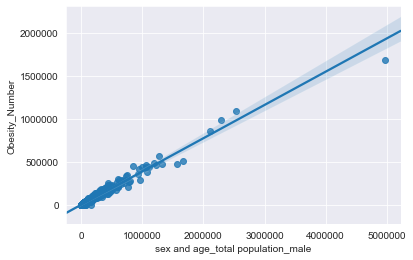

In [11]:
#Histogram of Obesity Number
sns.regplot(x='sex and age_total population_male', y='Obesity_Number', data=db2)

In [ ]:
sns.barplot(x='sex and age_total population_male', y='Obesity_Number', hue= 'race_total population_one race_black or african american', data=db2)

In [ ]:
#Histogram of_________
db2.hist(column = "Physical_Inactivity_Number")

## 1.2 Create a 'Diabetes_Proportion' Column

In [ ]:
db2['Diabetes_Proportion'] = db2['Diabetes_Number']/db2['race_total population']


In [ ]:
db2[['Diabetes_Proportion']]

Next we want to move the 'Diabetes_Proportion' column to the front of the dataframe

In [ ]:
col_name="Diabetes_Proportion"
first_col = db2.pop(col_name)
db2.insert(2, col_name, first_col)

In [ ]:
db2

# 2. The Test-Train-Validation Split 

So what we want to do is look at the features we'll be using for prediction

In [ ]:
#Feature used to predict diabetes_proportion
X = db2.drop(['Diabetes_Proportion', 'Diabetes_Number', 'Obesity_Number'], axis = 1)

#Proportion of diabetes by county 
y = db2['Diabetes_Proportion']

In [ ]:
#set the random seed
np.random.seed(10)

# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)


## 2.1 The Validation Set

In [ ]:
# split the data
# Returns 4 values: X_train, X_validate, y_train, y_validate

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

# 3. Train Models

## 3.1 Linear Regression (OLS)

In [ ]:
# create a model
lin_reg = LinearRegression(normalize=True)

# fit the model
lin_model = lin_reg.fit(X_train, y_train)

In [ ]:
print(lin_model.coef_)
print(lin_model.intercept_)

Now we are going to visualize the coefficents

In [ ]:
# get fearture importance
importance_ols = lin_model.coef_
# summarize feature importance
for i,v in enumerate(importance_ols):
	print('Feature: %0d, Score: %.6f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_ols))], importance_ols)
plt.show()

In [ ]:
# predict the diabetes number
lin_pred = lin_model.predict(X_validate)

# plot the residuals on a scatter plot
plt.scatter(y_validate, lin_pred)
plt.title('Linear Model (OLS) Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

Finally, we are going to calculate the **root means squared error** to get the average difference between the predicted and the actual values

In [ ]:
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

In [ ]:
rmse(lin_pred, y_validate)

## 3.2 Ridge Regression

Now that we got the RMSE for OLS, we're going to do the same for Ridge Regression

In [ ]:
# make and fit a Ridge regression model
ridge_reg = Ridge()
ridge_model = ridge_reg.fit(X_train, y_train)
ridge_reg_data = pd.DataFrame([ridge_model.coef_, X.columns]).T
ridge_reg_data.columns = ['Coefficient', 'Feature']

In [ ]:
print(lin_model.coef_)
print(lin_model.intercept_)

Now, we are going to plot the coefficients for the Ridge 

In [ ]:
# get feature importance
importance_ridge = ridge_model.coef_
# summarize feature importance
for i,v in enumerate(importance_ridge):
	print('Feature: %0d, Score: %.6f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_ridge))], importance_ridge)
plt.show()

Now we are going to use the Ridge model to make predictions and visualize the predictions against the actual values.

In [ ]:
# use the model to make predictions
ridge_pred = ridge_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, ridge_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [ ]:
# calculate the rmse for the Ridge model
rmse(ridge_pred, y_validate)

## 3.3 LASSO Regression

Now we'll try LASSO to compare its RMSE value to Ridge and Regression

In [ ]:
# create and fit the model
lasso_reg = Lasso(tol=.2)

lasso_model = lasso_reg.fit(X_train, y_train)
lasso_reg_data = pd.DataFrame([lasso_model.coef_, X.columns]).T
lasso_reg_data.columns = ['Coefficient', 'Feature']

Plot the coefficients for Ridge and Lasso

In [ ]:
# get feature importance
importance_lasso = lasso_model.coef_
# summarize feature importance
for i,v in enumerate(importance_lasso):
	print('Feature: %0d, Score: %.10f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_lasso))], importance_lasso)
plt.show()

Now we're going to use the LASSO model to make predictions and visualize the predictions against the actual values. 

In [ ]:

# use the model to make predictions
lasso_pred = lasso_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, lasso_pred)
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [ ]:
#calculate the rmse for the Ridge model
rmse(lasso_pred, y_validate)

## 3.4 Elastic - Net

In [ ]:
# create and fit the model
ElasNet_reg = ElasticNet(tol=.5)
ElasNet_model = ElasNet_reg.fit(X_train, y_train)
ElasNet_reg_data = pd.DataFrame([ElasNet_model.coef_, X.columns]).T
ElasNet_reg_data.columns = ['Coefficient', 'Feature']

In [ ]:
# get feature importance
importance_ElasNet = ElasNet_model.coef_
# summarize feature importance
for i,v in enumerate(importance_ElasNet):
	print('Feature: %0d, Score: %.10f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_ElasNet))], importance_ElasNet)
plt.show()

In [ ]:
# use the model to make predictions
ElasNet_pred = ElasNet_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, lasso_pred)
plt.title('Elastic net Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [ ]:
#calculate the rmse for the Ridge model
rmse(ElasNet_pred, y_validate)

## 3.5 Random Forest

In [ ]:
# create and fit the model
RandomF_reg = RandomForestRegressor(n_estimators= 71, random_state = 10)
RandomF_model = RandomF_reg.fit(X_train, y_train)

In [ ]:
# Build a forest and compute the impurity-based feature importances
importances = RandomF_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RandomF_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Plot Feature Importance

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center", width=.8)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# use the model to make predictions
RandomF_pred = RandomF_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, RandomF_pred)
plt.title('Random Forest Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [ ]:
#calculate the rmse for the Random Forest model
rmse(RandomF_pred, y_validate)

# 4. Hyperparameter Tuning (OLS, Ridge, LASSO, Elastic Net)

Hyperparameter tuning for OLS

In [ ]:
param_grid = {'fit_intercept': ['True', 'False'],
              'normalize': ['True', 'False']}

lin_grid_reg = GridSearchCV(lin_reg, param_grid, cv=3, iid=False)
lin_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lin_grid_reg.cv_results_["mean_test_score"])
best_lin_pred = lin_grid_reg.best_estimator_.predict(X_validate)

print(lin_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lin_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lin_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lin_pred, y_validate))

Hyperparameter tuning for Ridge

In [ ]:
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

ridge_grid_reg = GridSearchCV(ridge_reg, param_grid, cv=3, iid=False)
ridge_grid_reg.fit(X_train, y_train)

best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"])
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_validate)

print(ridge_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ridge_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_ridge_pred, y_validate))

Hyperparameter tuning for lasso

In [ ]:
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'selection': ['cyclic', 'random']}

lasso_grid_reg = GridSearchCV(lasso_reg, param_grid, cv=3, iid=False)
lasso_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"])
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate)

print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lasso_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lasso_pred, y_validate))

Hyperparameter tuning for Elastic Net

In [ ]:
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'selection': ['cyclic', 'random']}

ElasNet_grid_reg = GridSearchCV(ElasNet_reg, param_grid, cv=3, iid=False)
ElasNet_grid_reg.fit(X_train, y_train)

best_index = np.argmax(ElasNet_grid_reg.cv_results_["mean_test_score"])
best_ElasNet_pred = ElasNet_grid_reg.best_estimator_.predict(X_validate)

print(ElasNet_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ElasNet_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ElasNet_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_ElasNet_pred, y_validate))

Hyperperamter Tuning for Random Forest

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt']}

RandomF_grid_reg = GridSearchCV(RandomF_reg, param_grid, cv=3, iid=False)
RandomF_grid_reg.fit(X_train, y_train)

best_index = np.argmax(RandomF_grid_reg.cv_results_["mean_test_score"])
best_RandomF_pred = RandomF_grid_reg.best_estimator_.predict(X_validate)

print(RandomF_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(RandomF_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', RandomF_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_RandomF_pred, y_validate))

# 5. Test Set Using Random Forest

In [ ]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.013
sfm = SelectFromModel(RandomF_reg, threshold=0.013)

# Train the selector
sfm.fit(X_train, y_train)

In [ ]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
X_important_validate = sfm.transform(X_validate)

In [ ]:
# create a random forest regressor using only important features 
RF_important_reg = RandomForestRegressor(n_estimators= 71, random_state = 10)
RF_important_model = RF_important_reg.fit(X_important_train, y_train)

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center", width=.8)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# use the model to make predictions using important features
RF_important_pred = RF_important_model.predict(X_important_validate)

# plot the predictions
plt.scatter(y_validate, RF_important_pred)
plt.title('Random Forest Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [ ]:
#calculate the rmse for the Random Forest model
rmse(RF_important_pred, y_validate)

In [ ]:
#Hyperparameter tuning with important features 

param_grid = {'max_features': ['auto', 'sqrt']}

RandomF_grid_reg = GridSearchCV(RandomF_reg, param_grid, cv=3, iid=False)
RandomF_grid_reg.fit(X_important_train, y_train)

best_index = np.argmax(RandomF_grid_reg.cv_results_["mean_test_score"])
best_RandomF_pred = RandomF_grid_reg.best_estimator_.predict(X_important_validate)

print(RandomF_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(RandomF_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', RandomF_grid_reg.score(X_important_validate, y_validate))
print('Validation RMSE', rmse(best_RandomF_pred, y_validate))

In [ ]:
# make predictions for the test set using Random Forest Model
final_pred = RandomF_grid_reg.predict(X_important_test)
# calculate the rmse for the final predictions
print('Test set rmse: ', rmse(final_pred, y_test))

# 6. Cross Validation

First, we need to binarize the "Diabetes Proportion" column to perform CV and to plot a confusion matrix

In [ ]:
desc = db2["Diabetes_Proportion"].describe() 
desc

We see that .112038 makes up 75% of the distribution. Therefore, we can take all the counties above this threshold and label them as 1 and the ones below this threshold as 0

In [ ]:
conditions = [
    (db2['Diabetes_Proportion'] >= 0.112038),
    (db2['Diabetes_Proportion'] < 0.112038),
    ]
values = ['1', '0']
db2['Diabetes_Binarizer'] = np.select(conditions,values)

db2.head()

In [ ]:
#Feature used to predict diabetes_Binarizer
X2 = db2.drop(['Diabetes_Proportion', 'Diabetes_Number', 'Obesity_Number', 'Diabetes_Binarizer'], axis = 1)

#Proportion of diabetes by county 
y2 = db2['Diabetes_Binarizer']


Now we will create a new set of training, validation and test sets to do cross validation since we are changing "Y" to "Diabetes_Binarizer" 

In [ ]:
# set the random seed
np.random.seed(10)

# split the data
# train_test_split returns 4 values: X2_train, X2_test, y2_train, y2_test

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,
                                                    train_size=0.80, test_size=0.20)

Validation Set

In [ ]:
# split the data
# Returns 4 values: X_train, X_validate, y_train, y_validate

X2_train, X2_validate, y2_train, y2_validate = train_test_split(X2_train, y2_train,
                                                    train_size=0.75, test_size=0.25)

Now let's create and fit the model

In [ ]:
# create and fit the model
RF_reg = RandomForestClassifier(n_estimators= 71, random_state = 10)
RF_model = RF_reg.fit(X2_train, y2_train)

Now, I want to create a selector object that will use the random forest classifier to identify features that have an importance of more than 0.013

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


RF_pred = cross_val_predict(RF_reg, X2, y2, cv = 3)

cf_matrix = confusion_matrix(y2,RF_pred, normalize = "True")

df_cm = pd.DataFrame(cf_matrix, range(2),
              range(2))

df_cm = df_cm.rename(index=str, columns={0: "<.1120", 1: ">=.1120"})
df_cm.index = ["<.1120", ">=.1120"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()